In [1]:
%matplotlib inline 
from pylab import *
rcParams['font.size'] = 15
rcParams['legend.fontsize'] = 12
import numpy as np

inputs = eval(open("../inputs.txt").read())
sys.path.insert(0, inputs['CRANE_dir']+'/02_Inference')

from Fluence import *
# read inputs

# load npz file (NOTE: this is a large file)
print 'Loading Lookup Table'
f = np.load(inputs['Lookup_Table'])
print 'Finished Loading'
input_Z = f['input_Z']
input_A = f['input_A']
input_log10_E = f['input_log10_E']
input_log10_z = f['input_log10_z']

observed_log10_E = f['observed_log10_E']
observed_A = f['observed_A']
uhe_LUT = f['LUT']

fcalc = UHE_fluence(input_Z, input_A, input_log10_E, input_log10_z, observed_A, observed_log10_E, uhe_LUT)

Loading Lookup Table
Finished Loading
Initializing UHE_fluence


[[  1.72307703e-16   2.11061897e-16   2.20953146e-16 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.62350112e-16   4.17463331e-16   4.63688526e-16 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


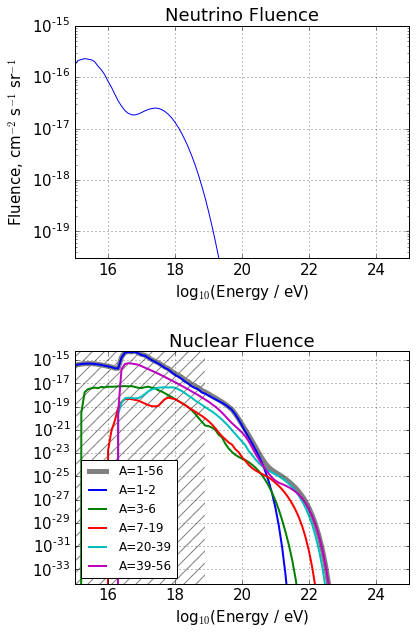

In [2]:
#fluence_parms = [norm,   spectral_index, E_max, f_He,      f_N,      f_Si,     f_Fe,     source_index, z1,   z2,   z3]
fluence_parms = [1.33e-62,+2.2,           20.0,  1.11e-04,  1.10e-04, 1.08e-04, 9.92e-02, 3.0,          1.87, 2.66, 3.01]
fluences = fcalc.fluence_model(*fluence_parms)

print fluences
#print input_log10_E

figure(figsize=(6,10))
ax=subplot(211)
ax.set_yscale('log')
plot(observed_log10_E, fluences[0,:], 'b-')
ylabel('Fluence, cm$^{-2}$ s$^{-1}$ sr$^{-1}$')
xlabel('log$_{10}$(Energy / eV)')
grid(True)
title('Neutrino Fluence')
mx = np.max(fluences[0,:])
y1,y2 = ax.get_ylim()
ylim(3.e-5*y2, y2)
xlim(15., 25.)
#legend(loc=0)

ax2=subplot(212)
ax2.set_yscale('log')
'''
for k in range(1,57):
    if(np.sum(fluences[k,:])>0.):
        ax2.plot(fcalc.LUT['observed_E'], fluences[k,:], 'b-', label='A=%d'%k)
'''
#nuc_fluence = np.sum(fluences[1:], axis=0)
ax2.plot(observed_log10_E, np.sum(fluences[1:], axis=0), 'gray', lw=5, label='A=1-56')
ax2.plot(observed_log10_E, np.sum(fluences[1:3], axis=0), lw=2, label='A=1-2')
ax2.plot(observed_log10_E, np.sum(fluences[3:7], axis=0), lw=2, label='A=3-6')
ax2.plot(observed_log10_E, np.sum(fluences[7:20], axis=0), lw=2, label='A=7-19')
ax2.plot(observed_log10_E, np.sum(fluences[20:40], axis=0), lw=2, label='A=20-39')
ax2.plot(observed_log10_E, np.sum(fluences[40:], axis=0), lw=2, label='A=39-56')
legend(loc=3)
xlim(15., 25.)
mxy = np.max(np.sum(fluences[1:], axis=0))
ylim(1.e-20*mxy, mxy)
y1, y2 = ax2.get_ylim()
fill_between([15., 18.9], [y1, y1], [y2,y2], facecolor='none', hatch='//', edgecolor='gray', linewidth=0.0)
#legend(loc=0)
title('Nuclear Fluence')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.4)
grid(True)


(5, 82, 51)


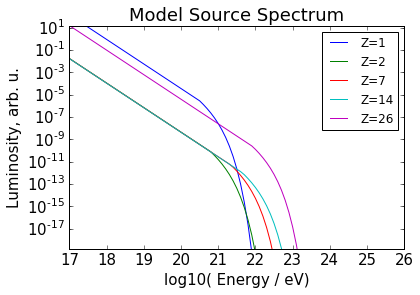

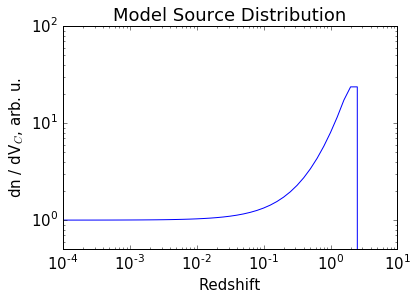

In [3]:
e_spec  = fcalc.source_energy_spectrum(spectral_index = fluence_parms[1])
src_dist = fcalc.source_distribution(source_index=fluence_parms[7], z1=fluence_parms[8], z2=fluence_parms[9], z3=fluence_parms[10])

vals = fcalc.source_model_array(fluence_parms[3:7], e_spec, src_dist, E_max=20.5)
print vals.shape
for k in range(0,5):
    semilogy(input_log10_E, vals[k,:,0], label='Z=%d'%input_Z[k] )
ylim(1.e-20*np.max(vals[k,:,0]), np.max(vals[k,:,0]))
legend()
title('Model Source Spectrum')
xlabel('log10( Energy / eV)')
ylabel('Luminosity, arb. u.')

figure()
ax=subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
plot(10**input_log10_z, src_dist)
y1,y2 = ax.get_ylim()
ylim(0.5, y2)
xlabel('Redshift')
ylabel(r'dn / dV$_C$, arb. u.')
title('Model Source Distribution')